In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import det_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [22]:
df=pd.read_csv(r'C:\Users\welcome\Desktop\Data Science College\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df.shape

(284807, 31)

In [24]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

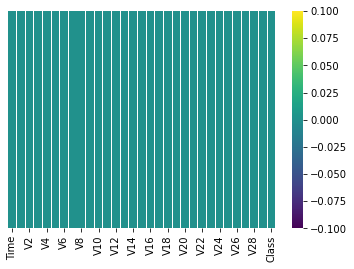

In [25]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [26]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
X=df.drop(columns='Class', axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [28]:
Y=df['Class']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Dealing with imbalance data

In [29]:
!pip install imblearn

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
UtoB=SMOTE(sampling_strategy='auto', random_state =35,
           k_neighbors=4)
X,Y=UtoB.fit_resample(X,Y)

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.33,random_state=35)

In [37]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred=lr.predict(X_test)
score=accuracy_score(y_pred, Y_test)
score

0.9624403137789904

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm=confusion_matrix(Y_test, y_pred,labels=lr.classes_)
cm

array([[92367,  1392],
       [ 5656, 88233]], dtype=int64)

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

In [51]:
cmd=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
cmd

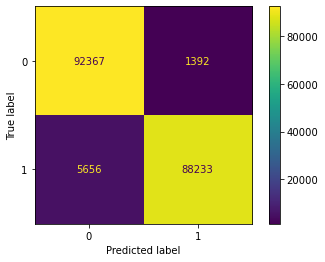

In [52]:
cmd.plot()

In [53]:
from sklearn.metrics import recall_score

In [54]:
print(recall_score(y_pred, Y_test, average='binary'))

0.9844686192468619


In [55]:
from sklearn.metrics import precision_score

In [56]:
print(precision_score(y_pred, Y_test, average='binary'))

0.9397586511731939


In [57]:
from sklearn.metrics import f1_score

In [58]:
print(f1_score(y_pred, Y_test, average='binary'))

0.9615942107959066


In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     93759
           1       0.98      0.94      0.96     93889

    accuracy                           0.96    187648
   macro avg       0.96      0.96      0.96    187648
weighted avg       0.96      0.96      0.96    187648

